In [1]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib


import rtmtools.lblrtm.aerutils as aerutils
importlib.reload(aerutils)
import rtmtools.clirad.sw.wrangle as cliradwrangle
importlib.reload(cliradwrangle)
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
importlib.reload(rrtmgwrangle)

import climatools.offline_scripts.intermodel as scripts_intermodel
importlib.reload(scripts_intermodel)


<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [3]:
name_molecule = 'CO2' #r'$H_{2}O$'

In [6]:
#### Load CRD results

In [4]:
# Get lbl line-by-line results
pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples', 
                           'lbl_H2008_{name_molecule}_cut25'\
                           .format(name_molecule=name_molecule),
                           'OUTPUT_RADSUM')

#pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_h2O_cut25/OUTPUT_RADSUM'

pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
                                                cooling_rate=True, 
                                                signed_fluxes=True)

print(pathout_crd)

/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_CO2_cut25/OUTPUT_RADSUM


In [5]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = os.path.join('/nuwa_cluster/home/jackyu',
                            'radiation/crd/LW/examples',
                            'lbl_H1996_{name_molecule}_cut10'\
                            .format(name_molecule=name_molecule),
                            'OUTPUT_RADSUM')

pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd1, 
                                                 cooling_rate=True, 
                                                 signed_fluxes=True)

print(pathout_crd1)

/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H1996_CO2_cut10/OUTPUT_RADSUM


In [6]:
#### Load CLIRAD results

In [7]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/LW/examples',
                              'mls75_{name_molecule}_H2012'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_CLIRAD.dat')

pnl_clirad = cliradwrangle.\
             OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad,
                                          cooling_rate=True, 
                                          signed_fluxes=True)

In [8]:
pathout_clirad_96 = os.path.join('/nuwa_cluster/home/jackyu',
                                 'radiation/clirad/LW/examples',
                                 'mls75_{name_molecule}'\
                                 .format(name_molecule=name_molecule),
                                 'OUTPUT_CLIRAD.dat')

pnl_clirad_96 = cliradwrangle.\
                OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad_96, 
                                             cooling_rate=True,
                                             signed_fluxes=True)

In [12]:
#### Load LBLRTM results

In [9]:
# Get AER line-by-line results
pathout_lblrtm = os.path.join('/nuwa_cluster/home/jackyu',
                              'line_by_line/aerlbl_v12.2_package',
                              'runs/LW/run_mls75pro_{name_molecule}'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_RADSUM')

pnl_lblrtm = aerutils.\
             OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_lblrtm, 
                                          signed_fluxes=True, 
                                          cooling_rate=True)

In [14]:
#### Load RRTMG results

In [12]:
pathout_rrtmg = os.path.join('/nuwa_cluster/home/jackyu',
                             'radiation/rrtmg/LW/examples',
                             'mls70_{name_molecule}'\
                             .format(name_molecule=name_molecule),
                             'OUTPUT_RRTM')

pnl_rrtmg = rrtmgwrangle.\
            OUTPUT_RRTM_to_pandasPanel(readfrom=pathout_rrtmg,
                                       signed_fluxes=True,
                                       cooling_rate = True)

# Whole spectral range

CRD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -383.273276   0.000000 -383.273276      0.000000
30   299.800000 -389.763984  21.277476 -368.486508      0.155939
0   1013.000000 -423.662018  77.656605 -346.005414      0.364312

LBLRTM
     pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.0024 -383.100650   0.000000 -383.100650      0.000000
30   299.8000 -389.784564  21.088600 -368.695964      0.146416
0   1013.0000 -423.532488  77.113869 -346.418619      0.352086

RRTMG
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -382.5392     0.0000 -382.5392       0.00000
30   299.70000 -389.3473    21.3458 -368.0015       0.14629
0   1013.00000 -423.5988    78.3065 -345.2923       0.39335

CLIRAD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -385.167538   0.012388 -385.155150     19.815700
30   299.800000 -391.205408  20.990990 -370.214418      0.153921
0   1013.000000 -423.78618

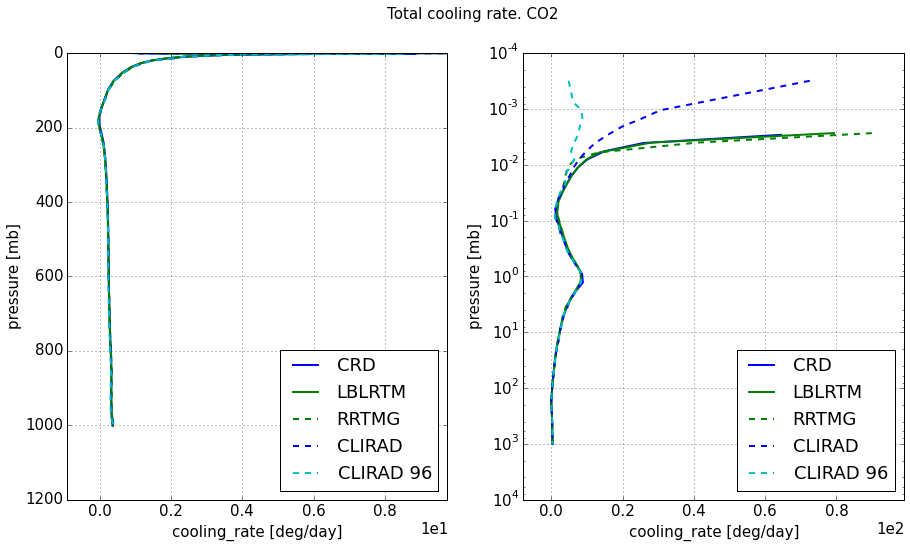

In [13]:
scripts_intermodel.lw_results_all_wavenumbers(
    infos_wavenumber=[('CRD', 'b', '-', pnl_crd),
                      ('LBLRTM', 'g', '-', pnl_lblrtm),
                      ('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_spectralband=[('CLIRAD', 'b', '--', pnl_clirad),
                        ('CLIRAD 96', 'c', '--', pnl_clirad_96)],
    name_molecule=name_molecule)

In [14]:
html_download = ('<a href="./longwave_mls_{name_molecule}_total.xlsx"'
                 'download>longwave_mls_{name_molecule}_total.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In RRTMG's wavenumber bands

Flux tables and cooling rates in RRTMG spectral bands


RRTMG-LW. Spectral band 1. 10.0 ~ 350.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -54.5825          0  -54.5825            -0
30   299.70000 -54.5825          0  -54.5825            -0
0   1013.00000 -54.5825          0  -54.5825            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -54.573788  0.000000e+00 -54.573788  0.000000e+00
30   299.800000 -54.573788  2.932884e-07 -54.573787  1.572515e-09
0   1013.000000 -54.573788  6.174024e-07 -54.573787  4.363773e-09

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -54.662493  0.000000e+00 -54.662493  0.000000e+00
30   299.8000 -54.662493  1.133169e-08 -54.662493  2.601352e-10
0   1013.0000 -54.581667  6.027854e-08 -54.581667  2.868963e-02

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003 -0.008712  0.000000e+00 -0.008712 -0

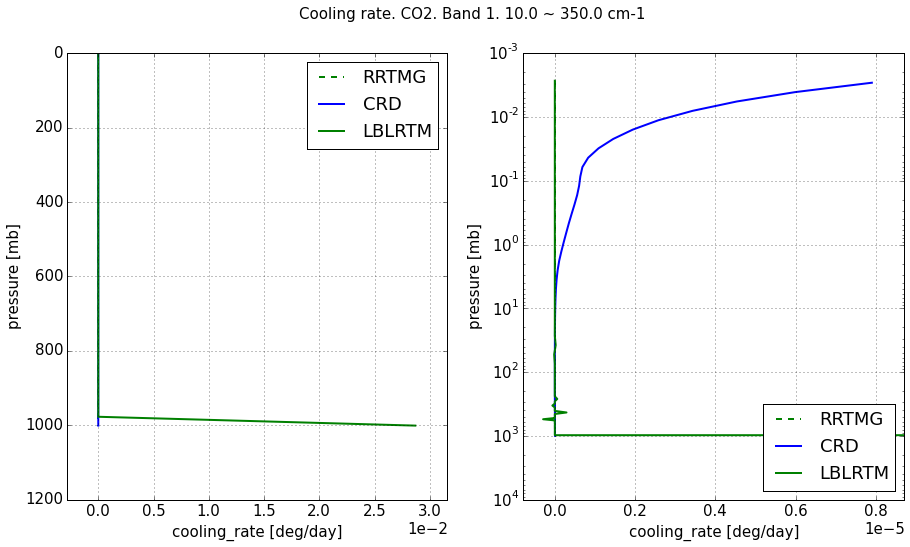


------------------------------------------------------------------------

RRTMG-LW. Spectral band 2. 350.0 ~ 500.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -60.9174          0  -60.9174            -0
30   299.70000 -60.9174          0  -60.9174            -0
0   1013.00000 -60.9174          0  -60.9174            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.916037   0.000000 -60.916037  0.000000e+00
30   299.800000 -60.916124   0.000088 -60.916036  6.718444e-07
0   1013.000000 -60.916638   0.004098 -60.912539  9.973436e-05

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.928294   0.000000 -60.928294  0.000000e+00
30   299.8000 -60.928382   0.000088 -60.928294  6.721261e-07
0   1013.0000 -60.917465   0.004240 -60.913225  4.166610e-03

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.001363   0.000000 -0.001363 -0.000000e+0

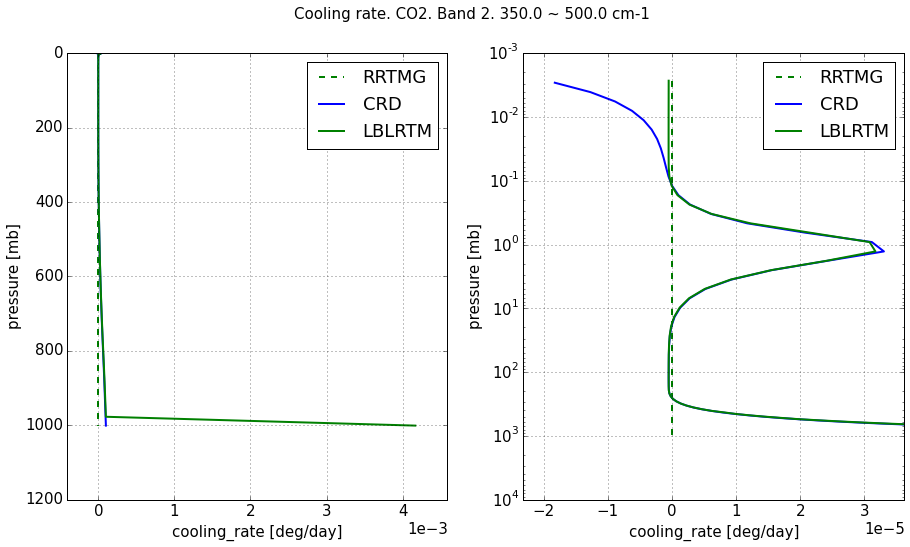


------------------------------------------------------------------------

RRTMG-LW. Spectral band 3. 500.0 ~ 630.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -50.5085     0.0000  -50.5085      -0.00000
30   299.70000 -52.2550     3.7925  -48.4625       0.06232
0   1013.00000 -58.6466    20.2704  -38.3762       0.14667

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -50.013538   0.000000 -50.013538      0.000000
30   299.800000 -51.778173   3.688252 -48.089921      0.060808
0   1013.000000 -58.652387  20.651726 -38.000661      0.146138

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -50.089815   0.000000 -50.089815      0.000000
30   299.8000 -51.879163   3.664142 -48.215022      0.057074
0   1013.0000 -58.646623  20.398981 -38.247643      0.147339

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.494962   0.000000 -0.494962     -0.00000

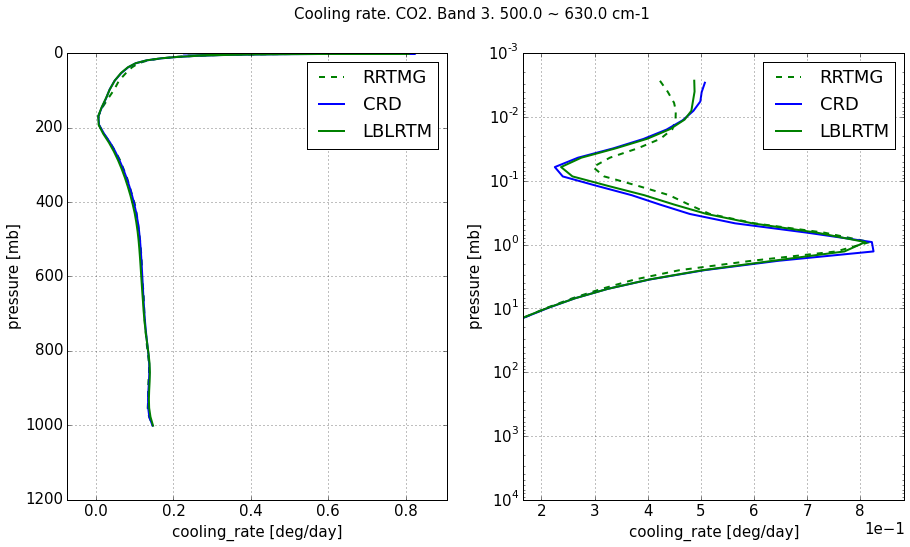


------------------------------------------------------------------------

RRTMG-LW. Spectral band 4. 630.0 ~ 700.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -11.9206     0.0000  -11.9206      -0.00000
30   299.70000 -14.5137    13.5131   -1.0006       0.04246
0   1013.00000 -30.8956    30.8437   -0.0519       0.01923

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -12.094168   0.000000 -12.094168      0.000000
30   299.800000 -14.490814  13.462047  -1.028767      0.044383
0   1013.000000 -30.901144  30.860796  -0.040348      0.012921

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -12.024680   0.000000 -12.024680      0.000000
30   299.8000 -14.566414  13.371418  -1.194996      0.042751
0   1013.0000 -30.895458  30.823546  -0.071911      0.015444

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.173568   0.000000  0.173568     -0.00000

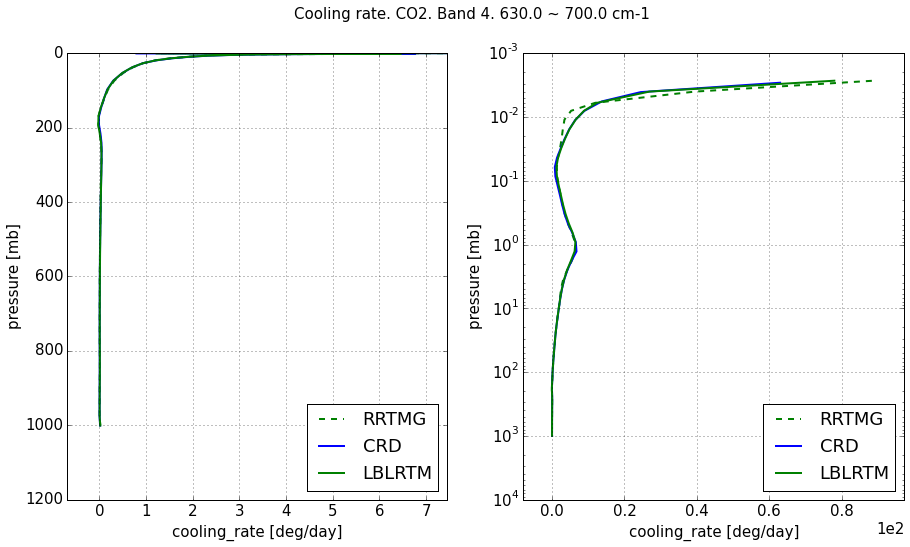


------------------------------------------------------------------------

RRTMG-LW. Spectral band 5. 700.0 ~ 820.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -37.0499     0.0000  -37.0499      -0.00000
30   299.70000 -39.2274     3.9085  -35.3189       0.05061
0   1013.00000 -48.8871    23.7295  -25.1576       0.16952

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -37.572063   0.000000 -37.572063      0.000000
30   299.800000 -39.674031   4.024062 -35.649969      0.057152
0   1013.000000 -48.899846  23.285903 -25.613942      0.155854

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -37.739301   0.000000 -37.739301      0.000000
30   299.8000 -39.854528   3.940537 -35.913991      0.053080
0   1013.0000 -48.886744  22.864324 -26.022420      0.154689

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.522163   0.000000  0.522163     -0.00000

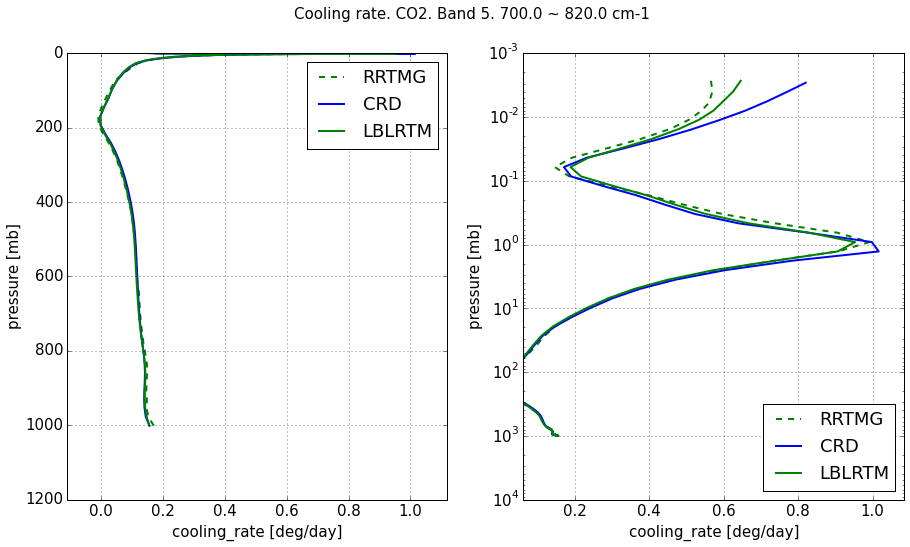


------------------------------------------------------------------------

RRTMG-LW. Spectral band 6. 820.0 ~ 980.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -53.6469     0.0000  -53.6469      -0.00000
30   299.70000 -53.7136     0.0234  -53.6902      -0.00157
0   1013.00000 -53.9607     0.9552  -53.0055       0.02181

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -53.700735   0.000000 -53.700735      0.000000
30   299.800000 -53.754410   0.023077 -53.731332     -0.001126
0   1013.000000 -53.981634   0.814348 -53.167285      0.017664

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -53.666749   0.000000 -53.666749      0.000000
30   299.8000 -53.719835   0.022087 -53.697748     -0.001120
0   1013.0000 -53.960338   0.782696 -53.177642      0.008939

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.053835   0.000000  0.053835     -0.00000

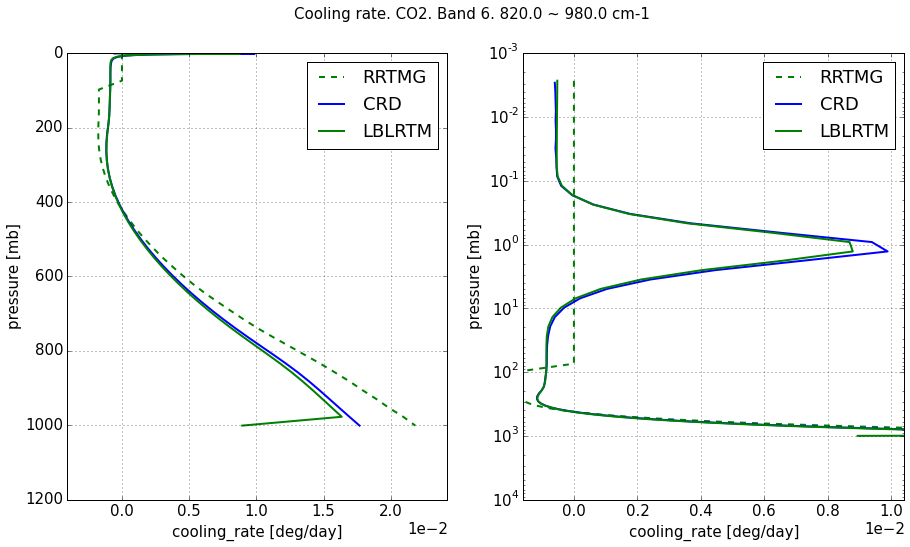


------------------------------------------------------------------------

RRTMG-LW. Spectral band 7. 980.0 ~ 1080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -26.2384     0.0000  -26.2384      -0.00000
30   299.70000 -26.3484     0.0353  -26.3131      -0.00218
0   1013.00000 -26.6401     0.9389  -25.7012       0.02001

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -26.304439   0.000000 -26.304439      0.000000
30   299.800000 -26.370653   0.025184 -26.345469     -0.001606
0   1013.000000 -26.654056   0.880085 -25.773972      0.018657

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -26.290021   0.000000 -26.290021      0.000000
30   299.8000 -26.355982   0.024205 -26.331776     -0.001603
0   1013.0000 -26.640246   0.850691 -25.789554      0.014198

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.066039   0.000000  0.066039     -0.0000

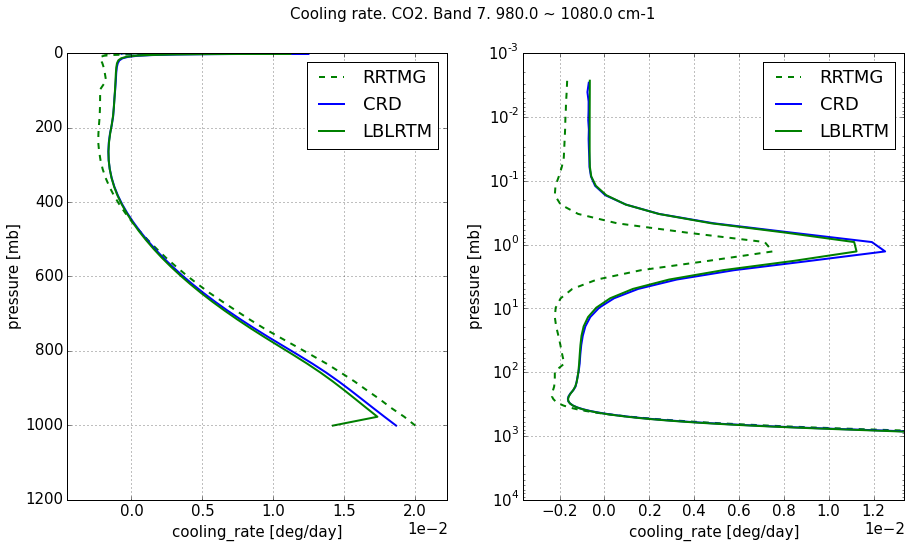


------------------------------------------------------------------------

RRTMG-LW. Spectral band 8. 1080.0 ~ 1180.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -21.4454     0.0000  -21.4454      -0.00000
30   299.70000 -21.4641     0.0050  -21.4591      -0.00048
0   1013.00000 -21.5225     0.1826  -21.3399       0.00441

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -21.465427   0.000000 -21.465427      0.000000
30   299.800000 -21.476758   0.004027 -21.472731     -0.000305
0   1013.000000 -21.535940   0.192343 -21.343597      0.004442

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -21.448097   0.000000 -21.448097      0.000000
30   299.8000 -21.459109   0.003766 -21.455343     -0.000295
0   1013.0000 -21.522739   0.178986 -21.343752      0.001087

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.020027   0.000000  0.020027     -0.000

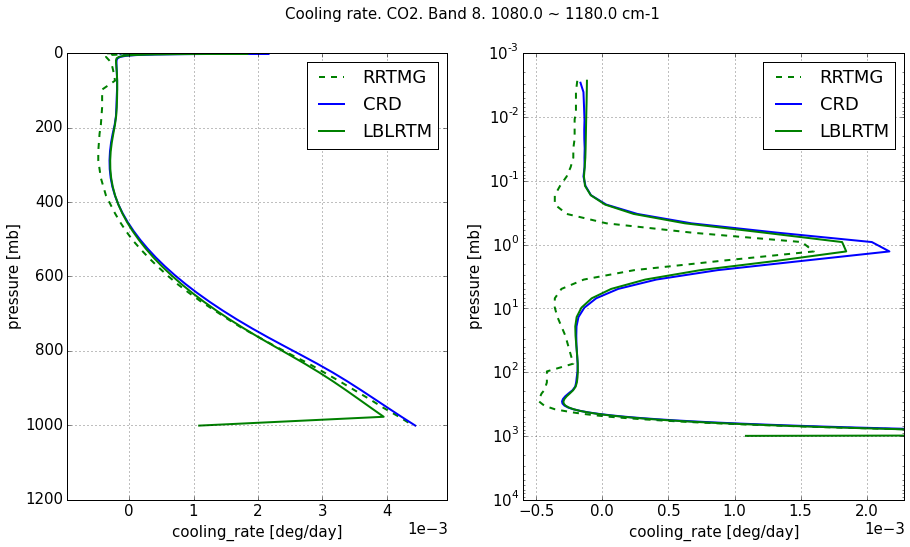


------------------------------------------------------------------------

RRTMG-LW. Spectral band 9. 1180.0 ~ 1390.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -31.2994          0  -31.2994            -0
30   299.70000 -31.2994          0  -31.2994            -0
0   1013.00000 -31.2994          0  -31.2994            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -31.247130   0.000000 -31.247130      0.000000
30   299.800000 -31.284525   0.006237 -31.278288     -0.000731
0   1013.000000 -31.323236   0.073322 -31.249914      0.001210

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -31.213357   0.000000 -31.213357      0.000000
30   299.8000 -31.250103   0.006031 -31.244072     -0.000709
0   1013.0000 -31.299603   0.070968 -31.228635     -0.003131

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.052270   0.000000 -0.052270     -0.000

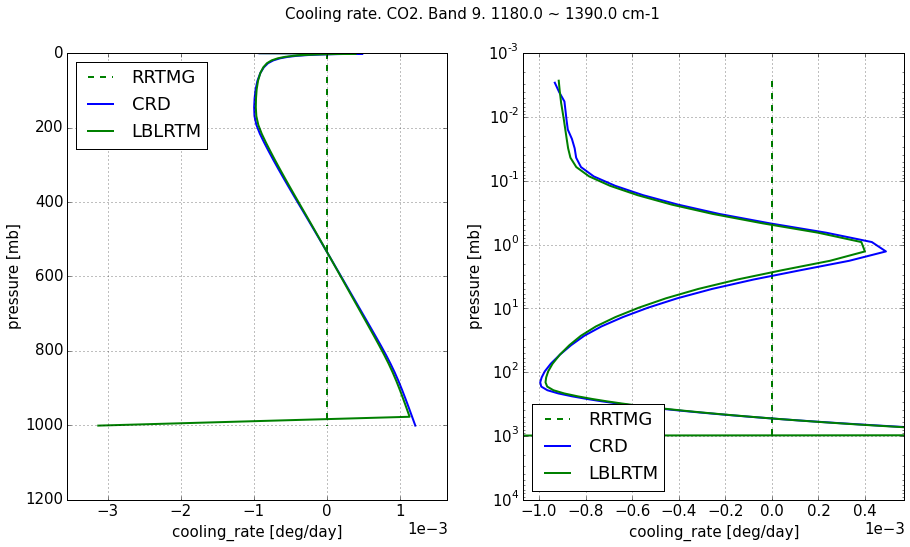


------------------------------------------------------------------------

RRTMG-LW. Spectral band 10. 1390.0 ~ 1480.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -8.8986          0   -8.8986            -0
30   299.70000  -8.8986          0   -8.8986            -0
0   1013.00000  -8.8986          0   -8.8986            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -8.903635   0.000000 -8.903635      0.000000
30   299.800000 -8.904803   0.000173 -8.904630     -0.000027
0   1013.000000 -8.906562   0.003409 -8.903153      0.000067

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -8.891755   0.000000 -8.891755      0.000000
30   299.8000 -8.892931   0.000173 -8.892758     -0.000027
0   1013.0000 -8.898490   0.003467 -8.895022     -0.001273

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.005035   0.000000  0.005035     -0.000000
30 -0.10000

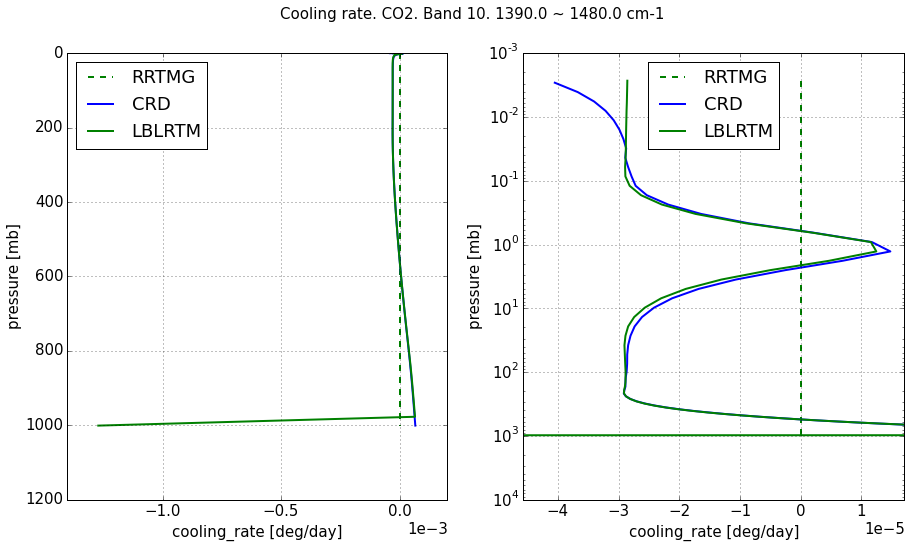


------------------------------------------------------------------------

RRTMG-LW. Spectral band 11. 1480.0 ~ 1800.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -17.8828          0  -17.8828            -0
30   299.70000 -17.8828          0  -17.8828            -0
0   1013.00000 -17.8828          0  -17.8828            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -17.902258  0.000000e+00 -17.902258  0.000000e+00
30   299.800000 -17.902258  2.293236e-08 -17.902258 -9.065695e-10
0   1013.000000 -17.902258  9.652420e-08 -17.902258  1.635737e-09

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -17.873994  0.000000e+00 -17.873994  0.000000e+00
30   299.8000 -17.873995  8.729626e-08 -17.873995 -2.659371e-08
0   1013.0000 -17.882889  1.134969e-05 -17.882877 -3.154926e-03

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.019458  0.

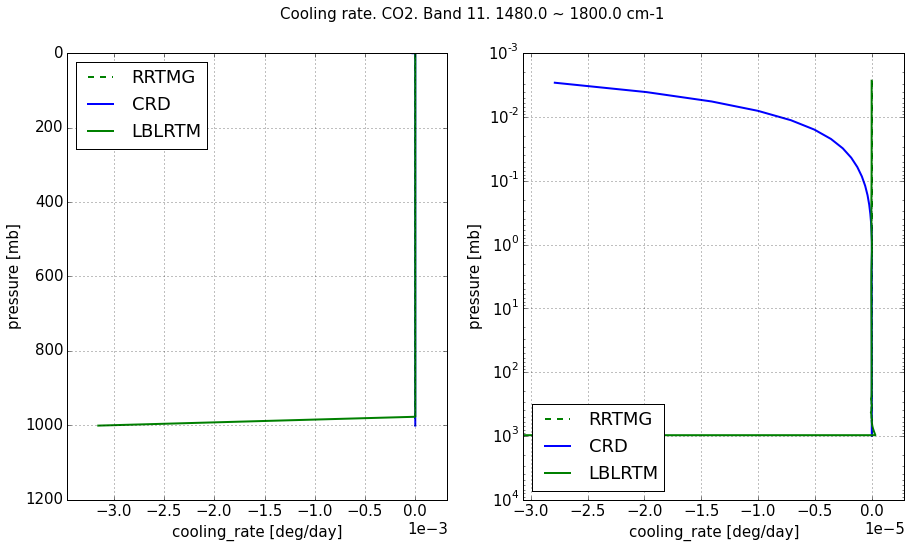


------------------------------------------------------------------------

RRTMG-LW. Spectral band 12. 1800.0 ~ 2080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -5.7512     0.0000   -5.7512      -0.00000
30   299.70000  -5.7979     0.0060   -5.7919      -0.00187
0   1013.00000  -5.9578     0.2047   -5.7531       0.00384

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -5.748949   0.000000 -5.748949      0.000000
30   299.800000 -5.798119   0.006325 -5.791794     -0.001787
0   1013.000000 -5.965987   0.211806 -5.754180      0.004055

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -5.683672   0.000000 -5.683672      0.000000
30   299.8000 -5.733237   0.006116 -5.727120     -0.001784
0   1013.0000 -5.957771   0.203226 -5.754545     -0.018190

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.002251   0.000000 -0.002251     -0.000000
30 -0.10000

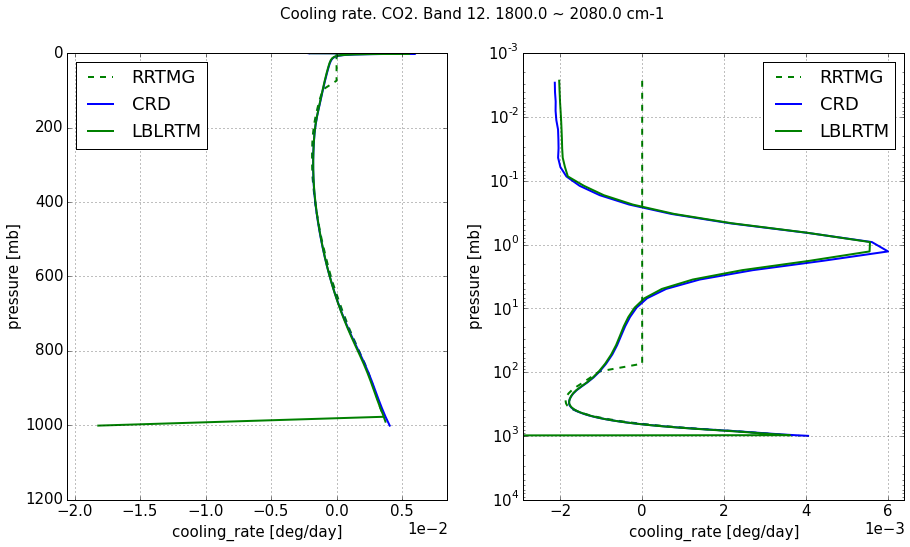


------------------------------------------------------------------------

RRTMG-LW. Spectral band 13. 2080.0 ~ 2250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -1.3537     0.0000   -1.3537      -0.00000
30   299.70000  -1.4036     0.0070   -1.3966      -0.00192
0   1013.00000  -1.6390     0.2811   -1.3579       0.00457

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -1.590261   0.000000 -1.590261      0.000000
30   299.800000 -1.602115   0.000924 -1.601191     -0.000437
0   1013.000000 -1.641655   0.053801 -1.587854      0.001306

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -1.474235   0.000000 -1.474235      0.000000
30   299.8000 -1.496126   0.003815 -1.492312     -0.000836
0   1013.0000 -1.639014   0.183644 -1.455370      0.002800

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.236561   0.000000  0.236561     -0.000000
30 -0.10000

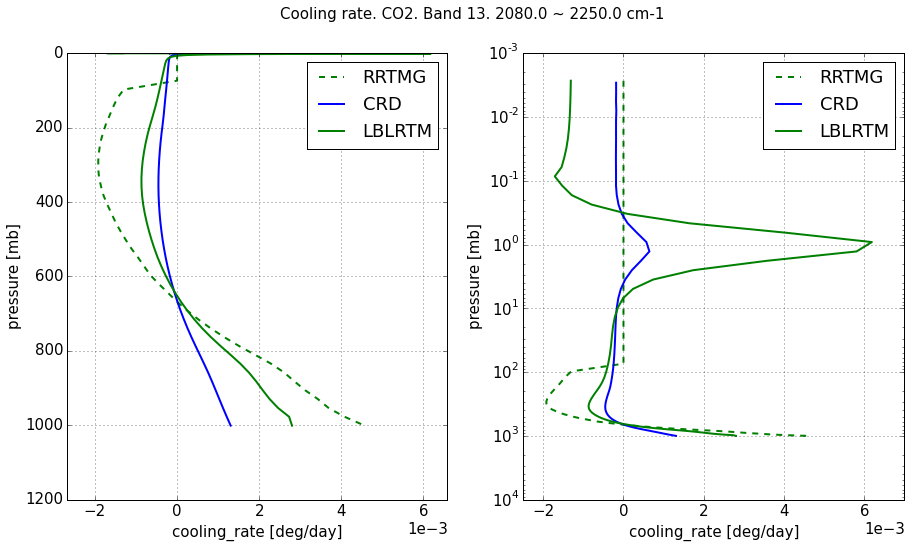


------------------------------------------------------------------------

RRTMG-LW. Spectral band 14. 2250.0 ~ 2380.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.0762     0.0000   -0.0762      -0.00000
30   299.70000  -0.0517     0.0513   -0.0004      -0.00001
0   1013.00000  -0.7316     0.7314   -0.0002       0.00008

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.236160   0.000000 -0.236160      0.000000
30   299.800000 -0.227483   0.034871 -0.192612     -0.000209
0   1013.000000 -0.732844   0.549390 -0.183454      0.001169

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.060062   0.000000 -0.060062      0.000000
30   299.8000 -0.061773   0.045019 -0.016754     -0.000339
0   1013.0000 -0.731556   0.724662 -0.006894      0.001244

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.159960   0.000000  0.159960     -0.000000
30 -0.10000

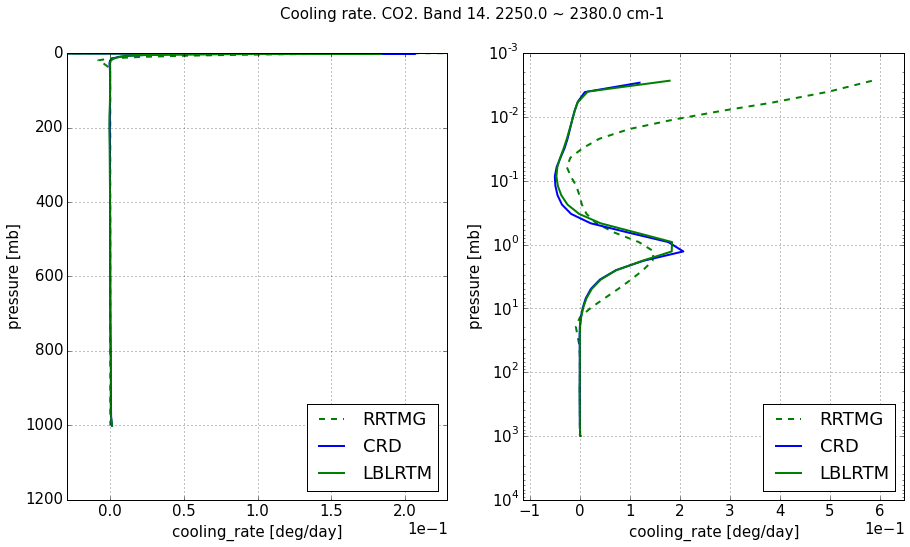


------------------------------------------------------------------------

RRTMG-LW. Spectral band 15. 2380.0 ~ 2600.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.4964     0.0000   -0.4964      -0.00000
30   299.70000  -0.5199     0.0037   -0.5162      -0.00107
0   1013.00000  -0.6658     0.1690   -0.4968       0.00321

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.598168   0.000000 -0.598168      0.000000
30   299.800000 -0.603234   0.002204 -0.601029     -0.000171
0   1013.000000 -0.667119   0.075381 -0.591739      0.000725

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.649414   0.000000 -0.649414      0.000000
30   299.8000 -0.645613   0.001198 -0.644415      0.000228
0   1013.0000 -0.665840   0.024235 -0.641604     -0.000431

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.101768   0.000000  0.101768     -0.000000
30 -0.10000

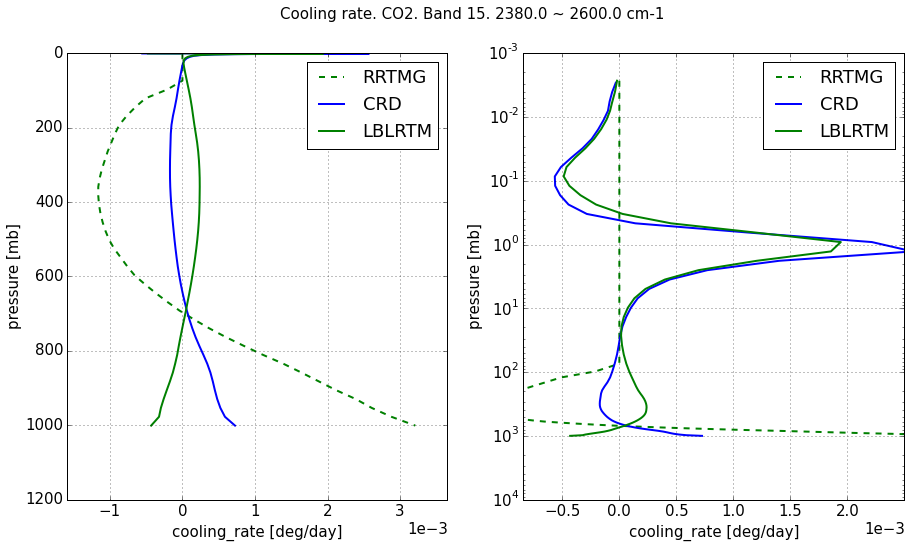


------------------------------------------------------------------------

RRTMG-LW. Spectral band 16. 2600.0 ~ 3250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.4713          0   -0.4713            -0
30   299.70000  -0.4713          0   -0.4713            -0
0   1013.00000  -0.4713          0   -0.4713            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.404025   0.000000 -0.404025      0.000000
30   299.800000 -0.404201   0.000004 -0.404197     -0.000005
0   1013.000000 -0.404431   0.000195 -0.404236      0.000005

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.402034   0.000000 -0.402034      0.000000
30   299.8000 -0.402204   0.000004 -0.402201     -0.000005
0   1013.0000 -0.403547   0.000191 -0.403356     -0.000393

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.067275   0.000000 -0.067275     -0.000000
30 -0.10000

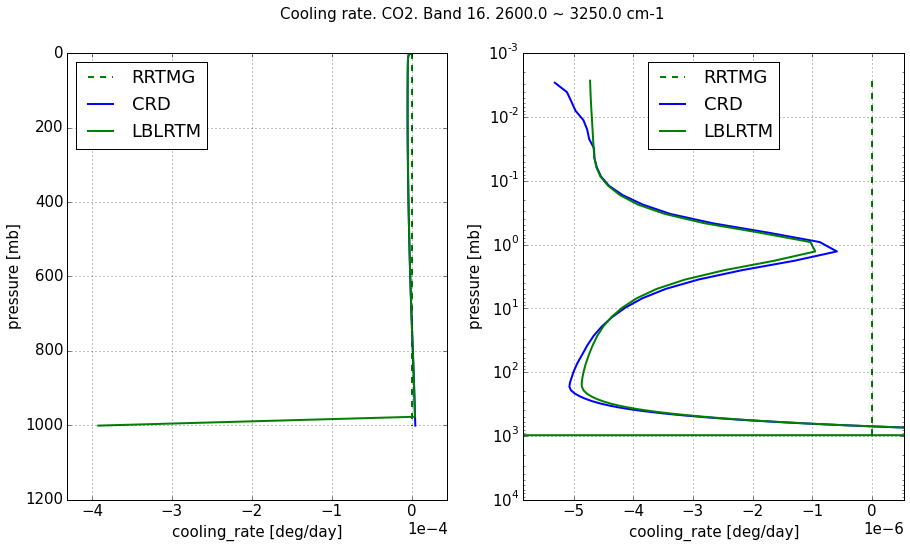


------------------------------------------------------------------------



In [15]:
print('Flux tables and cooling rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.lw_results_by_rrtmg_bands(
    infos_rrtmg=[('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd), 
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [16]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In CLIRAD's wavenumber bands

Flux tables and cooling rates in CLIRAD spectral bands


CLIRAD-LW Spectral band 1. 0 ~ 340 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -51.09212   0.000003 -51.092117 -5.771265e-07
30   299.800000 -51.09212   0.000003 -51.092117  2.273129e-09
0   1013.000000 -51.09213   0.000005 -51.092125  4.439772e-09

CRD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -51.09304  0.000000e+00 -51.093040  0.000000e+00
30   299.800000 -51.09304  2.770028e-07 -51.093040  1.518605e-09
0   1013.000000 -51.09304  5.836491e-07 -51.093039  4.121978e-09

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -51.180269  0.000000e+00 -51.180269  0.000000e+00
30   299.8000 -51.180269  1.139635e-08 -51.180269  2.614913e-10
0   1013.0000 -51.100657  5.105129e-08 -51.100657  2.825879e-02

CLIRAD - CRD
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0  0.00092   0.000003  0.000923 -5.7

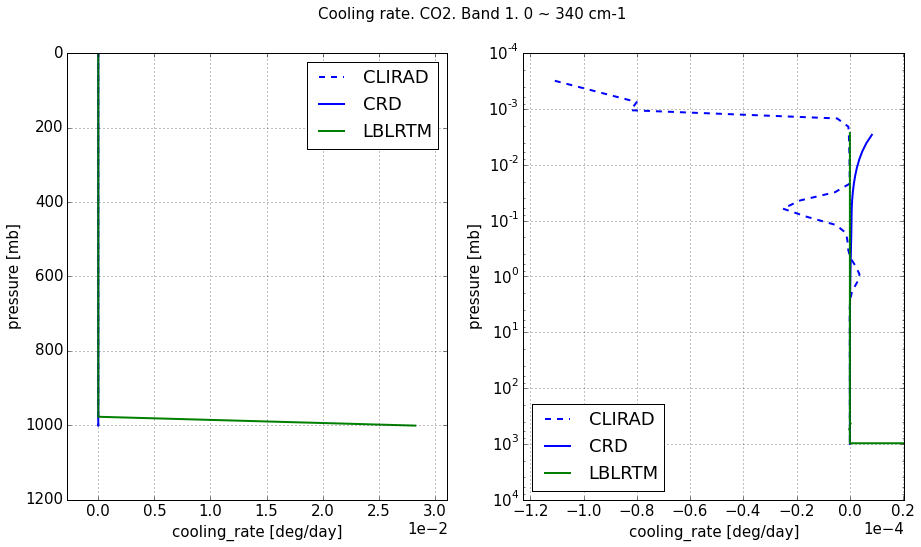


------------------------------------------------------------------------

CLIRAD-LW Spectral band 2. 340 ~ 540 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -82.31579   0.000003 -82.315787 -1.784270e-06
30   299.800000 -82.31579   0.000005 -82.315785  3.727262e-09
0   1013.000000 -82.31579   0.000008 -82.315782  1.023691e-08

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -82.280681   0.000000 -82.280681      0.000000
30   299.800000 -82.288931   0.007236 -82.281695      0.000028
0   1013.000000 -82.315835   0.169081 -82.146753      0.003434

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -82.293027   0.000000 -82.293027      0.000000
30   299.8000 -82.301149   0.006975 -82.294174      0.000023
0   1013.0000 -82.315849   0.162686 -82.153163      0.007236

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.035109   0.000003 -0.035106   

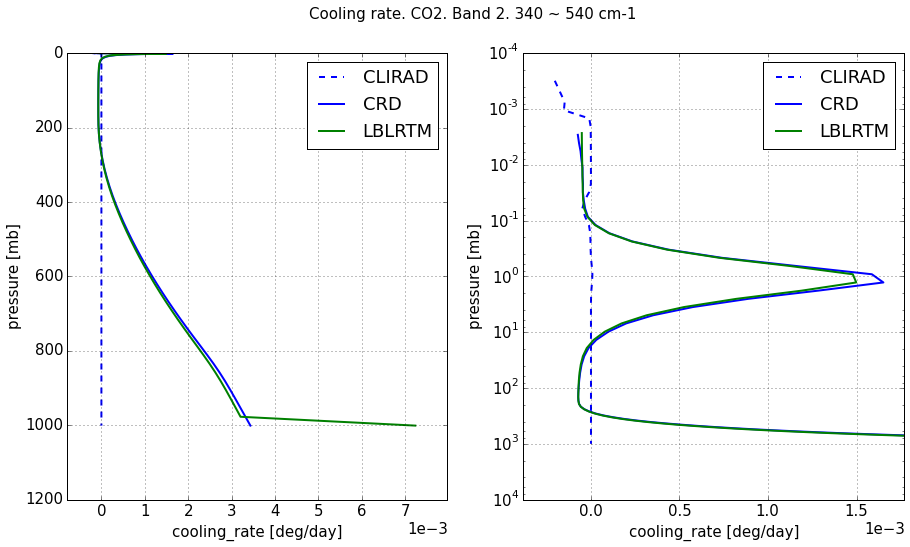


------------------------------------------------------------------------

CLIRAD-LW Spectral band 3. 540 ~ 800 cm-1

CLIRAD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417  -74.98077   0.012381 -74.968389     19.817050
30   299.800000  -80.90141  20.936500 -59.964910      0.156616
0   1013.000000 -112.81600  73.503190 -39.312810      0.356743

CRD
       pressure     flux_up  flux_down   net_flux  cooling_rate
70     0.002417  -74.188410   0.000000 -74.188410      0.000000
30   299.800000  -80.423601  21.156397 -59.267205      0.162592
0   1013.000000 -112.837813  74.354289 -38.483524      0.305978

LBLRTM
     pressure     flux_up  flux_down   net_flux  cooling_rate
70     0.0024  -74.362434   0.000000 -74.362434      0.000000
30   299.8000  -80.782419  20.959595 -59.822824      0.153147
0   1013.0000 -112.816764  73.668361 -39.148403      0.310727

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.792360   0.012381 

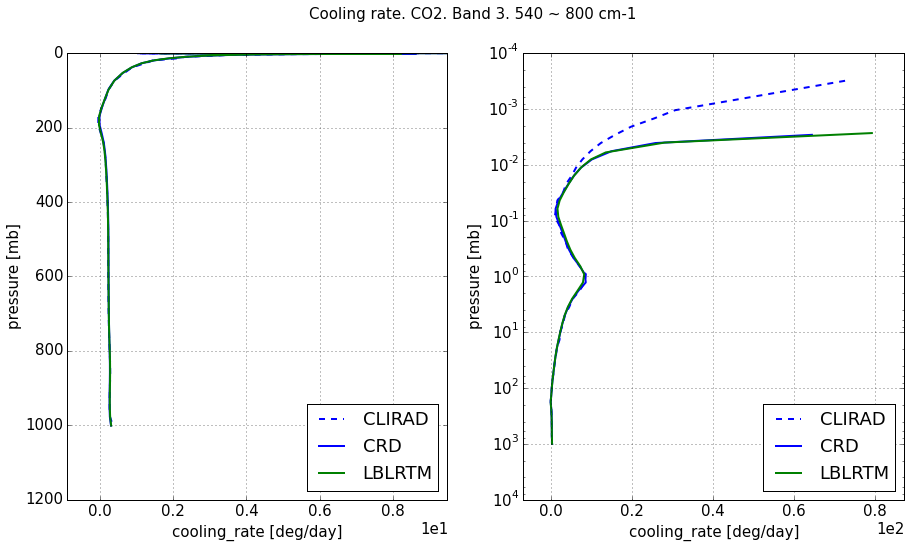


------------------------------------------------------------------------

CLIRAD-LW Spectral band 4. 800 ~ 980 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -61.28252  4.420017e-08 -61.282520     -0.000446
30   299.800000 -61.32943  2.575173e-02 -61.303678     -0.001012
0   1013.000000 -61.64931  1.214190e+00 -60.435120      0.024057

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -61.310693   0.000000 -61.310693      0.000000
30   299.800000 -61.384263   0.033894 -61.350369     -0.001403
0   1013.000000 -61.681243   1.093502 -60.587741      0.023263

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -61.278278   0.000000 -61.278278      0.000000
30   299.8000 -61.349655   0.031702 -61.317953     -0.001385
0   1013.0000 -61.657526   1.042740 -60.614785      0.013108

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.028173  4.42001

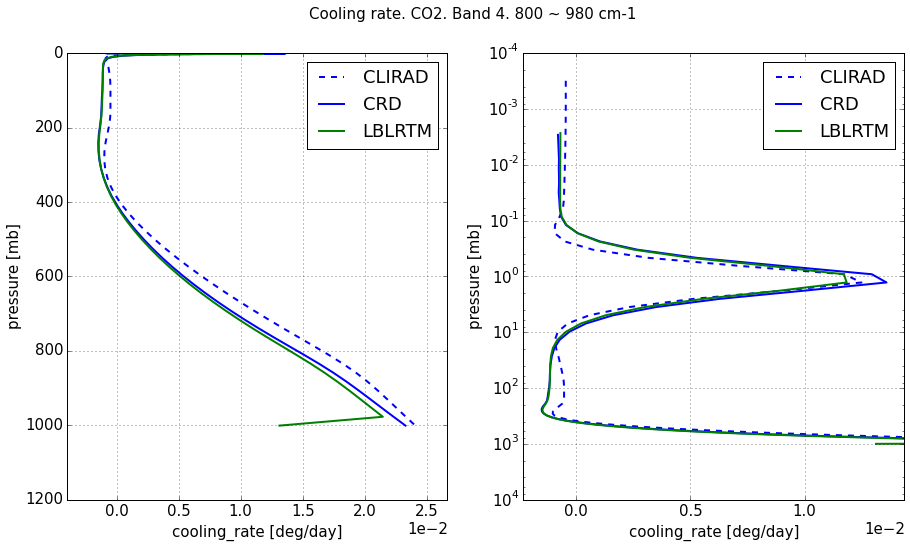


------------------------------------------------------------------------

CLIRAD-LW Spectral band 5. 980 ~ 1100 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.92727  4.965726e-07 -30.927270     -0.000900
30   299.800000 -30.99759  2.873002e-02 -30.968860     -0.001683
0   1013.000000 -31.34389  1.066895e+00 -30.276995      0.020659

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -30.934387   0.000000 -30.934387      0.000000
30   299.800000 -31.011912   0.029204 -30.982708     -0.001911
0   1013.000000 -31.354231   1.071269 -30.282962      0.023063

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.919803   0.000000 -30.919803      0.000000
30   299.8000 -30.996757   0.027965 -30.968792     -0.001897
0   1013.0000 -31.337711   1.028693 -30.309018      0.017637

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.007117  4.9657

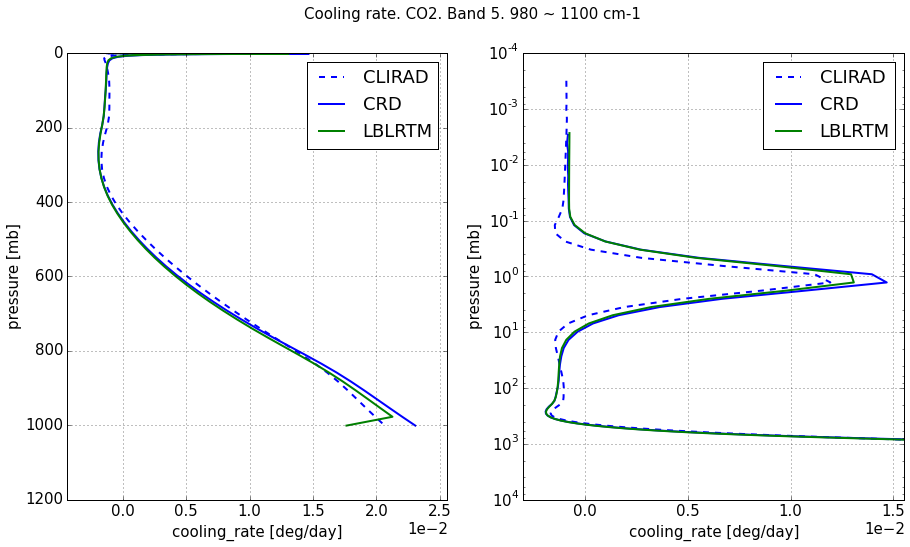


------------------------------------------------------------------------

CLIRAD-LW Spectral band 6. 1100 ~ 1215 cm-1

CLIRAD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -23.27341          0 -23.27341            -0
30   299.800000 -23.27341          0 -23.27341            -0
0   1013.000000 -23.27341          0 -23.27341            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -23.269313   0.000000 -23.269313      0.000000
30   299.800000 -23.269348   0.000010 -23.269338     -0.000001
0   1013.000000 -23.269652   0.001256 -23.268396      0.000038

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -23.245248   0.000000 -23.245248      0.000000
30   299.8000 -23.245293   0.000013 -23.245281     -0.000001
0   1013.0000 -23.254791   0.001186 -23.253605     -0.003229

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.004097   0.000000 -0.004097     

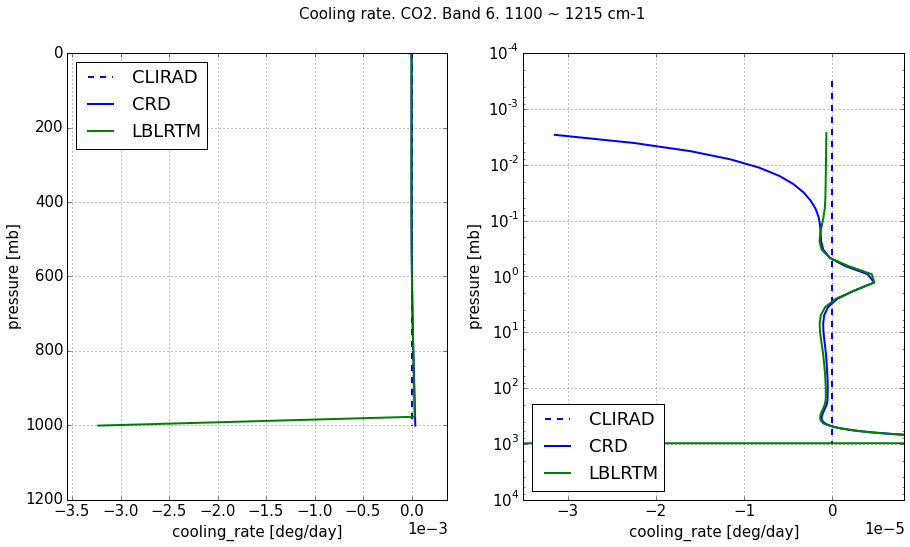


------------------------------------------------------------------------

CLIRAD-LW Spectral band 7. 1215 ~ 1380 cm-1

CLIRAD
       pressure  flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -23.7406  2.289835e-16  -23.7406            -0
30   299.800000 -23.7406  1.887379e-15  -23.7406            -0
0   1013.000000 -23.7406  3.608225e-15  -23.7406            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -23.685410   0.000000 -23.685410      0.000000
30   299.800000 -23.719820   0.005797 -23.714023     -0.000668
0   1013.000000 -23.755165   0.067299 -23.687866      0.001106

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -23.659913   0.000000 -23.659913      0.000000
30   299.8000 -23.693705   0.005602 -23.688103     -0.000648
0   1013.0000 -23.736876   0.065068 -23.671808     -0.002148

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.055190  2.289835e-16 

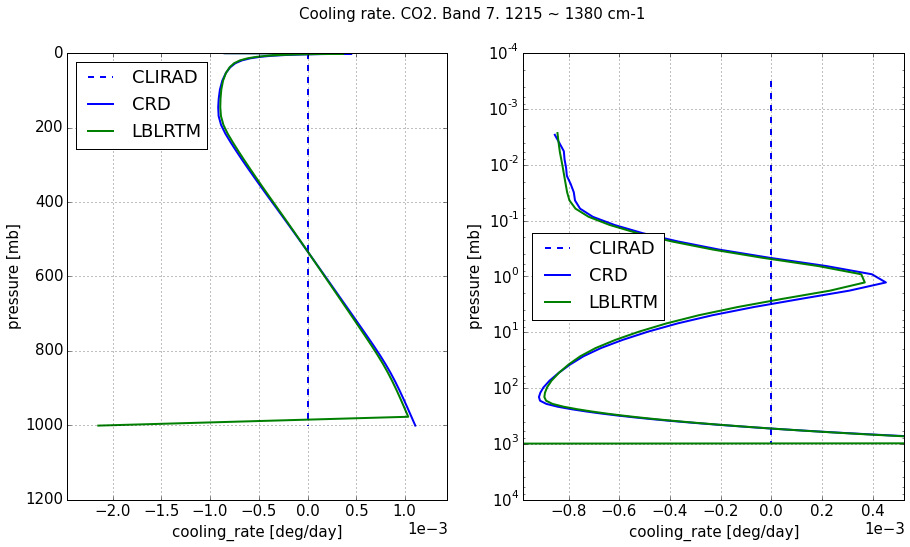


------------------------------------------------------------------------

CLIRAD-LW Spectral band 8. 1380 ~ 1900 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.88056  1.657780e-07 -30.880560 -1.230132e-06
30   299.800000 -30.88056  4.821160e-07 -30.880560 -1.326435e-09
0   1013.000000 -30.88056  3.055093e-06 -30.880557  1.175503e-08

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -30.712876   0.000000 -30.712876      0.000000
30   299.800000 -30.719132   0.000782 -30.718350     -0.000156
0   1013.000000 -30.729595   0.017626 -30.711969      0.000368

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.666144   0.000000 -30.666144      0.000000
30   299.8000 -30.672409   0.000765 -30.671644     -0.000155
0   1013.0000 -30.697533   0.017385 -30.680148     -0.004893

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.167684  1.657

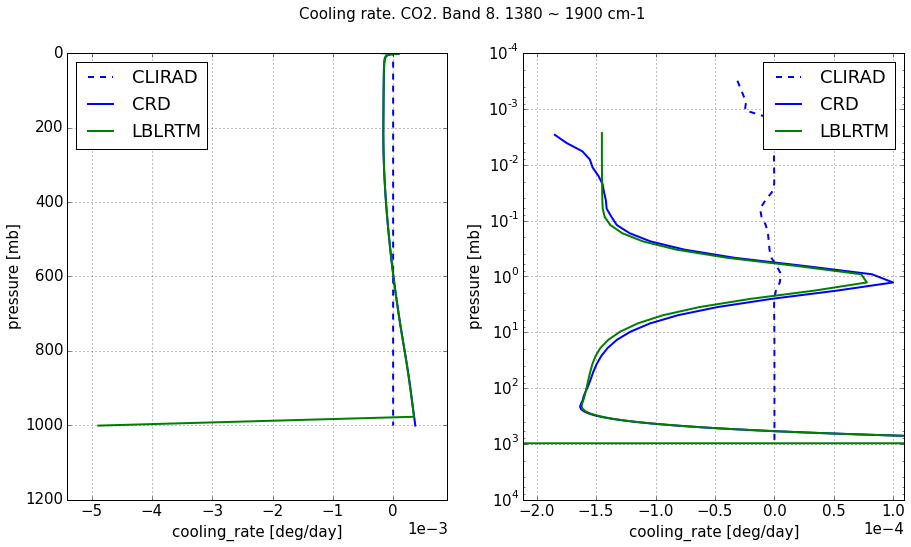


------------------------------------------------------------------------

CLIRAD-LW Spectral band 9. 1900 ~ 3000 cm-1

CLIRAD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -6.674498          0 -6.674498            -0
30   299.800000 -6.674498          0 -6.674498            -0
0   1013.000000 -6.674498          0 -6.674498            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -5.798467   0.000000 -5.798467      0.000000
30   299.800000 -5.853937   0.044156 -5.809781     -0.002542
0   1013.000000 -6.625445   0.882282 -5.743164      0.007061

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -5.495534   0.000000 -5.495534      0.000000
30   299.8000 -5.562908   0.055983 -5.506925     -0.002668
0   1013.0000 -6.614782   1.127750 -5.487032     -0.014611

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.876031   0.000000 -0.876031     -0.000000
30    

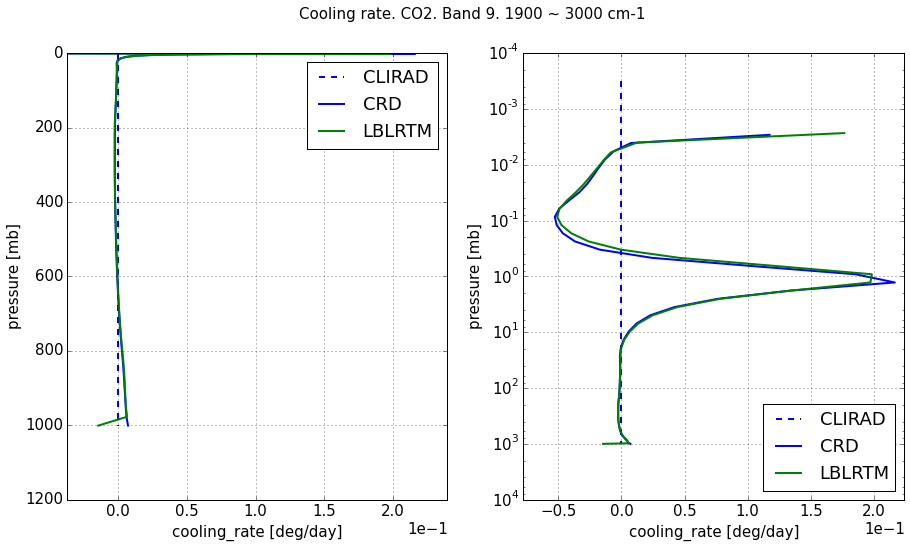


------------------------------------------------------------------------

CLIRAD-LW Spectral band 10. 540 ~ 620 cm-1

CLIRAD
       pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.002417       -0          0         0            -0
30   299.800000       -0          0         0            -0
0   1013.000000       -0          0         0            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -29.922537   0.000000 -29.922537       0.00000
30   299.800000 -31.195592   2.531070 -28.664522       0.04107
0   1013.000000 -36.235420  16.135422 -20.099999       0.13053

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.007802   0.000000 -30.007802      0.000000
30   299.8000 -31.291673   2.485550 -28.806123      0.038305
0   1013.0000 -36.231410  15.925742 -20.305668      0.130990

CLIRAD - CRD
    pressure    flux_up  flux_down   net_flux  cooling_rate
70         0  29.922537   0.000000  29.922537      

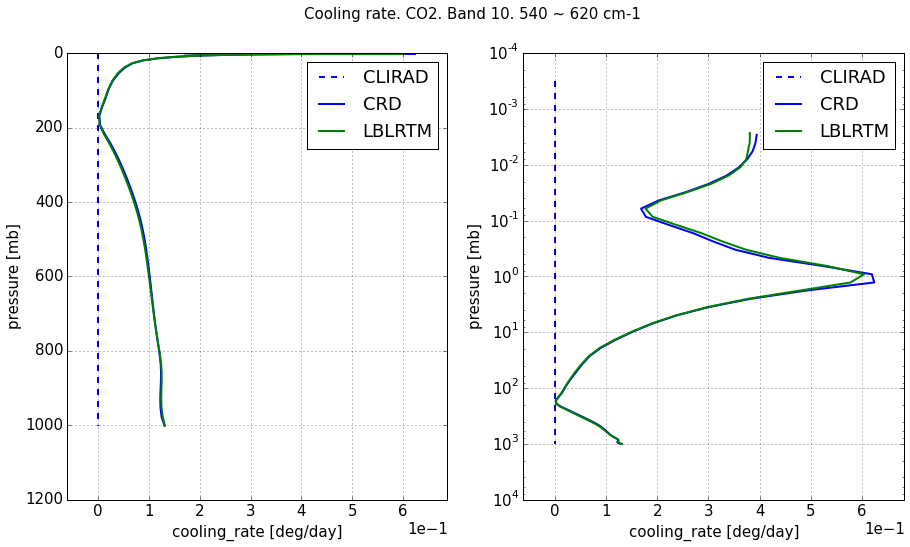


------------------------------------------------------------------------



In [17]:
print('Flux tables and cooling rates in CLIRAD spectral bands')
print()
print()

scripts_intermodel.lw_results_by_cliard_bands(
    infos_clirad=[('CLIRAD', 'b', '--', pnl_clirad)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd),
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [18]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

In [19]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')